## Project: 🌿Cotton Plant Disease Prediction 

In [1]:
#import libraries
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
tf.keras.optimizers.Adam
from keras.callbacks import ModelCheckpoint

# for accuracy and loss graph
import matplotlib.pyplot as plt

In [2]:
keras.__version__

'2.5.0'

In [3]:
train_data_path = "train"
validation_data_path = "val"

### v4, epochs 500

In [4]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [5]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 1951 images belonging to 4 classes.


In [6]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [7]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


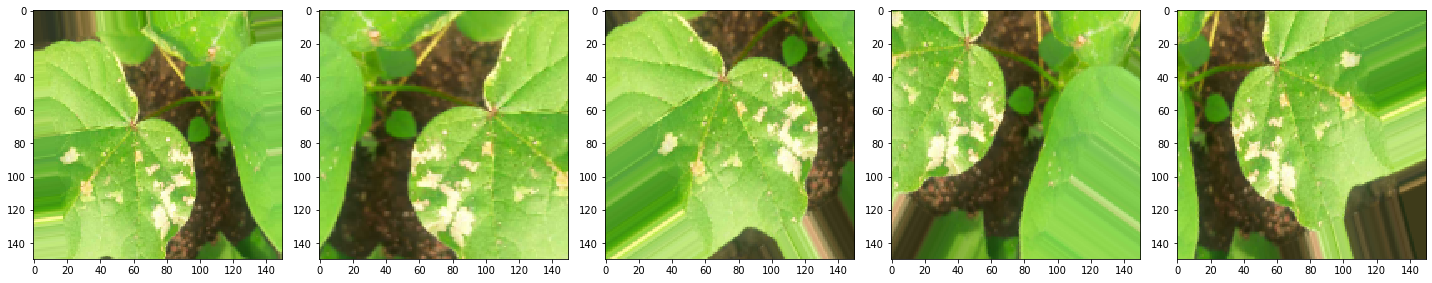

In [8]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [9]:
# save best model using vall accuracy
model_path = 'v4_pred_cott_dis.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [10]:

#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [11]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [12]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 16.06

Epoch 1/100
61/61 [==============================] - 60s 703ms/step - loss: 1.3282 - accuracy: 0.3952 - val_loss: 0.9576 - val_accuracy: 0.6605

Epoch 00001: val_accuracy improved from -inf to 0.66049, saving model to v4_pred_cott_dis.h5
Epoch 2/100
61/61 [==============================] - 41s 672ms/step - loss: 1.0851 - accuracy: 0.5325 - val_loss: 0.8715 - val_accuracy: 0.6080

Epoch 00002: val_accuracy did not improve from 0.66049
Epoch 3/100
61/61 [==============================] - 41s 677ms/step - loss: 1.0602 - accuracy: 0.5570 - val_loss: 0.7761 - val_accuracy: 0.6821

Epoch 00003: val_accuracy improved from 0.66049 to 0.68210, saving model to v4_pred_cott_dis.h5
Epoch 4/100
61/61 [==============================] - 42s 679ms/step - loss: 0.8771 - accuracy: 0.6408 - val_loss: 0.7373 - val_accuracy: 0.7006

Epoch 00004: val_accuracy improved from 0.68210 to 0.70062, saving model to v4_pred_cott_dis.h5
Epoch 5/100
61/61 [==============================] - 41s 675ms/step - loss: 0.83

61/61 [==============================] - 45s 734ms/step - loss: 0.2256 - accuracy: 0.9191 - val_loss: 0.1151 - val_accuracy: 0.9691

Epoch 00039: val_accuracy did not improve from 0.97840
Epoch 40/100
61/61 [==============================] - 45s 723ms/step - loss: 0.2752 - accuracy: 0.9080 - val_loss: 0.2163 - val_accuracy: 0.9228

Epoch 00040: val_accuracy did not improve from 0.97840
Epoch 41/100
61/61 [==============================] - 47s 767ms/step - loss: 0.2726 - accuracy: 0.9031 - val_loss: 0.1880 - val_accuracy: 0.9167

Epoch 00041: val_accuracy did not improve from 0.97840
Epoch 42/100
61/61 [==============================] - 47s 776ms/step - loss: 0.2708 - accuracy: 0.8961 - val_loss: 0.2188 - val_accuracy: 0.8920

Epoch 00042: val_accuracy did not improve from 0.97840
Epoch 43/100
61/61 [==============================] - 47s 769ms/step - loss: 0.2740 - accuracy: 0.8983 - val_loss: 0.1644 - val_accuracy: 0.9475

Epoch 00043: val_accuracy did not improve from 0.97840
Epoch 44

61/61 [==============================] - 48s 795ms/step - loss: 0.1897 - accuracy: 0.9405 - val_loss: 0.3069 - val_accuracy: 0.8796

Epoch 00079: val_accuracy did not improve from 0.98765
Epoch 80/100
61/61 [==============================] - 47s 772ms/step - loss: 0.1626 - accuracy: 0.9485 - val_loss: 0.0789 - val_accuracy: 0.9877

Epoch 00080: val_accuracy did not improve from 0.98765
Epoch 81/100
61/61 [==============================] - 47s 769ms/step - loss: 0.1991 - accuracy: 0.9350 - val_loss: 0.1164 - val_accuracy: 0.9691

Epoch 00081: val_accuracy did not improve from 0.98765
Epoch 82/100
61/61 [==============================] - 46s 762ms/step - loss: 0.1606 - accuracy: 0.9449 - val_loss: 0.1182 - val_accuracy: 0.9630

Epoch 00082: val_accuracy did not improve from 0.98765
Epoch 83/100
61/61 [==============================] - 47s 777ms/step - loss: 0.2005 - accuracy: 0.9407 - val_loss: 0.0612 - val_accuracy: 0.9846

Epoch 00083: val_accuracy did not improve from 0.98765
Epoch 84

In [13]:
model_path2 = 'v4_1_pred_cott_dis.h5'
cnn_model.save(model_path2)

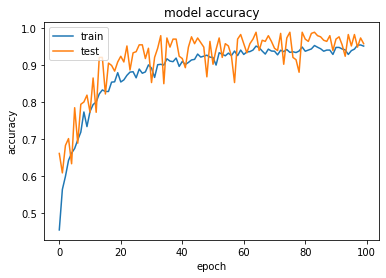

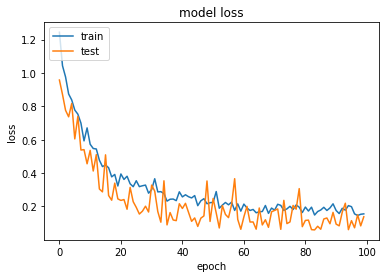

In [14]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
history.history

{'loss': [1.244045615196228,
  1.0435919761657715,
  0.9759479761123657,
  0.8738743662834167,
  0.8382953405380249,
  0.7776458263397217,
  0.7530644536018372,
  0.6994529366493225,
  0.5930428504943848,
  0.6708886623382568,
  0.5728305578231812,
  0.547424852848053,
  0.5444328784942627,
  0.47714322805404663,
  0.43916600942611694,
  0.4481242299079895,
  0.43197712302207947,
  0.37740546464920044,
  0.3918084502220154,
  0.3227465748786926,
  0.3947394788265228,
  0.3619508743286133,
  0.38109999895095825,
  0.3358239531517029,
  0.31848281621932983,
  0.35406938195228577,
  0.3189087510108948,
  0.32404789328575134,
  0.328128844499588,
  0.2795012891292572,
  0.3007250130176544,
  0.3661350905895233,
  0.2873501479625702,
  0.28869956731796265,
  0.27732133865356445,
  0.23208799958229065,
  0.24333596229553223,
  0.2444930225610733,
  0.23489855229854584,
  0.28771308064460754,
  0.2573269009590149,
  0.270027220249176,
  0.25840991735458374,
  0.251123309135437,
  0.2651928961